# Regression Task #1

In [165]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Creating dataset for linear regression

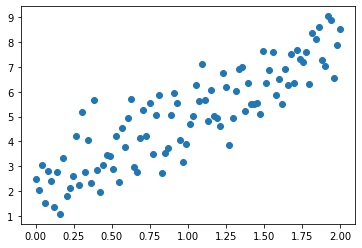

In [166]:
X1=np.array(range(100))
X1=X1/np.mean(X1)
Y1=3*X1+2+np.random.randn(100)
Y1=Y1.reshape(Y1.size,1)
X1 = np.vstack((np.ones((X1.size,)),X1)).T
plt.scatter(X1[:,1],Y1)
plt.show()

## Loss Function
Loss function defined as loss(h,Y,p) where h is the hypothesis, Y the true values and p is the power used as defined in the task for loss function $|X-\hat{X}|^p$

In [167]:
def loss(h,Y,p):
    return np.mean((h-Y)**p)

## Regression Model

In [168]:
def model(X,Y,alpha,itr,params,power):
    m=Y.size
    theta = np.random.randn(params).reshape((params,1))
    loss_hist = []
    for i in range(itr):
        h=np.dot(X,theta)
        l=loss(h,Y,power)
        theta = theta -(alpha/m)*(((X@theta)-Y).T@X).T
        loss_hist.append(l)
    return theta, loss_hist

## Linear Regression using loss functions $|X-\hat{X}|^3$ and $|X-\hat{X}|$ and plots

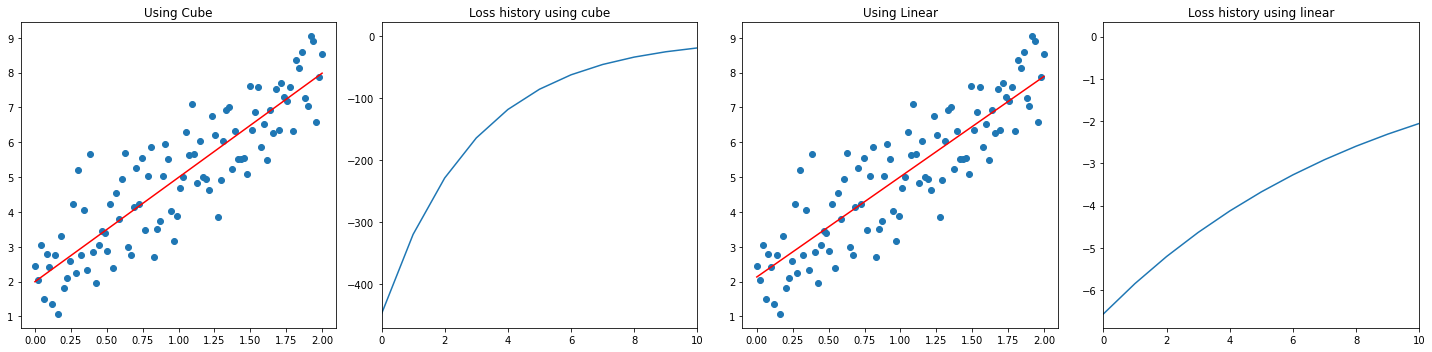

In [169]:
%matplotlib inline
t1, loss_hist = model(X1,Y1,0.05,100,2,3)
x=np.array(range(100))/np.mean(range(100))
y=t1[1]*x+t1[0]
plt.rcParams['figure.figsize'] = [20,5]
plt.subplot(1,4,1)
plt.title("Using Cube")
plt.scatter(X1[:,1],Y1)
plt.plot(x,y,color='r')
plt.subplot(1,4,2)
plt.title("Loss history using cube")
plt.plot(loss_hist)
plt.xlim([0,10])
t2, loss_hist = model(X1,Y1,0.05,100,2,1)
x=np.array(range(100))/np.mean(range(100))
y=t2[1]*x+t2[0]
plt.subplot(1,4,3)
plt.title("Using Linear")
plt.scatter(X1[:,1],Y1)
plt.plot(x,y,color='r')
plt.subplot(1,4,4)
plt.title("Loss history using linear")
plt.plot(loss_hist)
plt.xlim([0,10])
plt.tight_layout()
plt.show()

## Creating dataset for polynomial(degree 2) regression

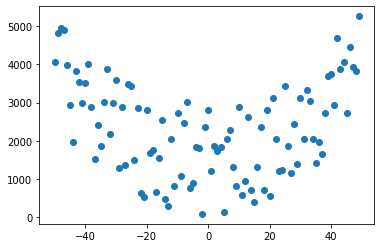

In [170]:
%matplotlib inline
X=np.array(range(-50,50))
Y=(X)**2+3*(X+np.random.randint(1000,size=100))
Y=Y.reshape(Y.size,1)
X = np.vstack((np.ones((X.size,)),X)).T
X = np.c_[X,(np.array(X[:,1]**2))]
plt.scatter(X[:,1],Y)
plt.show()

## Polynomial Regression using loss functions $|X-\hat{X}|^4$ and $|X-\hat{X}|^7$ and plots

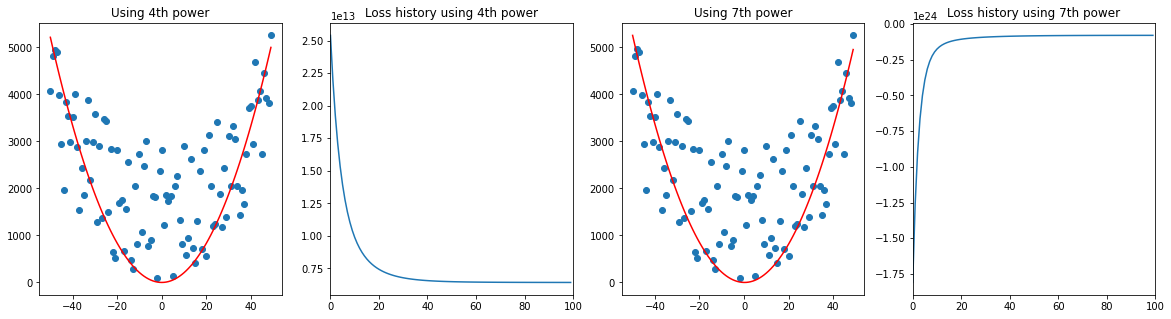

In [171]:
t1, loss_hist = model(X,Y,0.00000005,100,3,4)
x=np.array(X[:,1])
y=t1[2]*(x**2)+t1[1]*x+t1[0]
plt.rcParams['figure.figsize'] = [20,5]
plt.subplot(1,4,1)
plt.title("Using 4th power")
plt.scatter(X[:,1],Y)
plt.plot(x,y,color='r')
plt.subplot(1,4,2)
plt.title("Loss history using 4th power")
plt.plot(loss_hist)
plt.xlim([0,100])
t2, loss_hist = model(X,Y,0.00000005,100,3,7)
y=t2[2]*(x**2)+t2[1]*x+t2[0]
plt.subplot(1,4,3)
plt.title("Using 7th power")
plt.scatter(X[:,1],Y)
plt.plot(x,y,color='r')
plt.subplot(1,4,4)
plt.title("Loss history using 7th power")
plt.plot(loss_hist)
plt.xlim([0,100])
plt.show()